In [1]:
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading Dataset
mall_df=pd.read_csv('Mall_Customers.csv')

# Data Cleansing

In [3]:
# Basic insights
mall_df.shape

(1180, 6)

In [4]:
mall_df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),City
0,1,Male,19,15,39.0,New York
1,2,Male,21,15,81.0,Seattle
2,3,Female,20,16,6.0,Los Angeles.
3,4,Female,23,16,77.0,Chicago.
4,5,Female,31,17,40.0,Houston.


In [5]:
# Checking Null values & data types 
mall_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1180 entries, 0 to 1179
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   CustomerID              1180 non-null   int64  
 1   Gender                  1180 non-null   object 
 2   Age                     1180 non-null   int64  
 3   Annual Income (k$)      1180 non-null   int64  
 4   Spending Score (1-100)  942 non-null    float64
 5   City                    1180 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 55.4+ KB


Here we can see that Spending Score have some null values.   
Rest of data frame doesnt have any null values and all of their data types are good too.  

**Here Spending Score is our target variable so we are going to drop all the rows which consist of null values**

In [6]:
row_drop=mall_df[mall_df['Spending Score (1-100)'].isnull()==True].index

In [7]:
mall_df.drop(index=row_drop,inplace=True)

In [8]:
# Exploring Spending Score column
mall_df['Spending Score (1-100)'].unique()

array([39., 81.,  6., 77., 40., 76., 94.,  3., 72., 14., 99., 15., 13.,
       79., 35., 66., 29., 98., 73.,  5., 82., 32., 61., 31., 87.,  4.,
       92., 17., 26., 75., 36., 28., 65., 55., 47., 42., 52., 60., 54.,
       45., 41., 50., 46., 51., 56., 59., 48., 49., 53., 44., 57., 58.,
       43., 91., 95., 11.,  9., 34., 71., 88.,  7., 10., 93., 12., 97.,
       74., 22., 90., 20., 16., 89.,  1., 78., 83., 27., 63., 86., 69.,
       24., 68., 85., 23.,  8., 18.])

In [9]:
mall_df['CustomerID'].nunique()

942

Customer Id is unique id alloted to each customer by mall its not going to be used in EDA or model making so we will drop it

In [10]:
mall_df.drop('CustomerID',axis=1,inplace=True)

In [11]:
# Checkin for Duplicate values
mall_df.duplicated().sum()

1

In [12]:
# Droping duplicate values
mall_df.drop_duplicates(inplace=True)

In [13]:
mall_df.sample(5)

,Gender,Age,Annual Income (k$),Spending Score (1-100),City
527,Male,21,71,35.0,Los Angeles.
1165,Female,37,85,95.0,Seattle
1099,Male,34,61,55.0,Phoenix.
50,Female,49,42,52.0,Philadelphia.
1095,Male,30,60,46.0,Seattle


exploring all the reamining columns

In [14]:
mall_df['Gender'].value_counts()

Female    524
Male      417
Name: Gender, dtype: int64

In [15]:
mall_df['City'].value_counts()

Los Angeles.     108
Chicago.         108
Houston.         108
Phoenix.         108
Philadelphia.    107
San Antonio.     107
San Diego        107
Washington        80
New York          54
Seattle           54
Name: City, dtype: int64

In [16]:
mall_df['Annual Income (k$)'].unique()

array([ 15,  16,  17,  18,  19,  20,  21,  23,  24,  25,  28,  29,  30,
        33,  34,  37,  38,  39,  40,  42,  43,  44,  46,  47,  48,  49,
        50,  54,  57,  58,  59,  60,  61,  62,  63,  64,  65,  67,  69,
        70,  71,  72,  73,  74,  75,  76,  77,  78,  79,  81,  85,  86,
        87,  88,  93,  97,  98,  99, 101, 103, 113, 120, 126, 137],
      dtype=int64)

In [17]:
mall_df['Age'].unique()

array([19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 24, 37, 52, 25, 46, 54,
       29, 45, 40, 60, 53, 18, 49, 42, 36, 65, 48, 50, 27, 33, 59, 47, 51,
       69, 70, 63, 43, 68, 32, 26, 57, 38, 55, 34, 66, 39, 44, 28, 56, 41],
      dtype=int64)

In [18]:
# Renaming Annual income & Spending Score column
mall_df.rename(columns={ 'Annual Income (k$)': 'Annual Income', 'Spending Score (1-100)': 'Spending Score %'},inplace=True)

In [19]:
mall_df.tail()

,Gender,Age,Annual Income,Spending Score %,City
1175,Female,47,88,73.0,Chicago.
1176,Male,48,88,10.0,Houston.
1177,Male,49,88,72.0,Phoenix.
1178,Male,50,93,5.0,Philadelphia.
1179,Male,51,93,93.0,San Antonio.


In [20]:
def category(i):
    if i<=20:
        return('Miser')                       
    elif i<=40 and i >20:
        return('Carefull')                        
    elif i==50 :
        return('Centroid')                        
    elif i>40 and i <=60 and i!=50:
        return('Genral')                        
    elif i<=80 and i >60:
        return('Target')                        
    elif i>80:
        return('Spendthrift') 
    else:
        return(i)

In [21]:
mall_df['Category spending']=mall_df['Spending Score %'].apply(category)

In [22]:
def age_category(x):
    if x>17 and x<=30:
        return ('Young')                                      
    elif x>30 and x<=50:
        return('Middle')                                   
    elif x>50:
        return('Old')                                             
    else:
        return(x)

In [23]:
mall_df['Category Age']=mall_df['Age'].apply(age_category)

In [24]:
mall_df

,Gender,Age,Annual Income,Spending Score %,City,Category spending,Category Age
0,Male,19,15,39.0,New York,Carefull,Young
1,Male,21,15,81.0,Seattle,Spendthrift,Young
2,Female,20,16,6.0,Los Angeles.,Miser,Young
3,Female,23,16,77.0,Chicago.,Target,Young
4,Female,31,17,40.0,Houston.,Carefull,Middle
...,...,...,...,...,...,...,...
1175,Female,47,88,73.0,Chicago.,Target,Middle
1176,Male,48,88,10.0,Houston.,Miser,Middle
1177,Male,49,88,72.0,Phoenix.,Target,Middle
1178,Male,50,93,5.0,Philadelphia.,Miser,Middle


In [25]:
mall_df.describe()

,Age,Annual Income,Spending Score %
count,941.000000,941.000000,941.000000
mean,37.690755,61.012752,50.178533
std,12.577378,24.874576,25.256556
min,18.000000,15.000000,1.000000
25%,28.000000,43.000000,35.000000
50%,36.000000,62.000000,50.000000
75%,47.000000,78.000000,72.000000
max,70.000000,137.000000,99.000000


# Data visualization

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

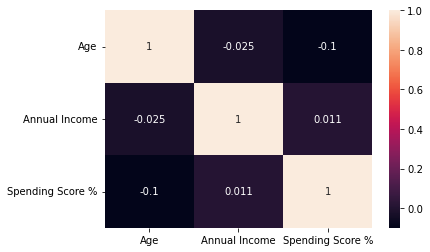

In [27]:
plt.figure()
sns.heatmap(mall_df.corr(),annot=True)
plt.show()

**Some of the variables have an extremely weak postive correlation Like Spending Score and Annual Income with a correlation of 0.011 can be assumed to be independent of each other. Apart from this weak negative correlations also exist in the dataset with Spending Score and Age have a correlation of -0.1, implying that older people might spend less than their younger counterparts.**

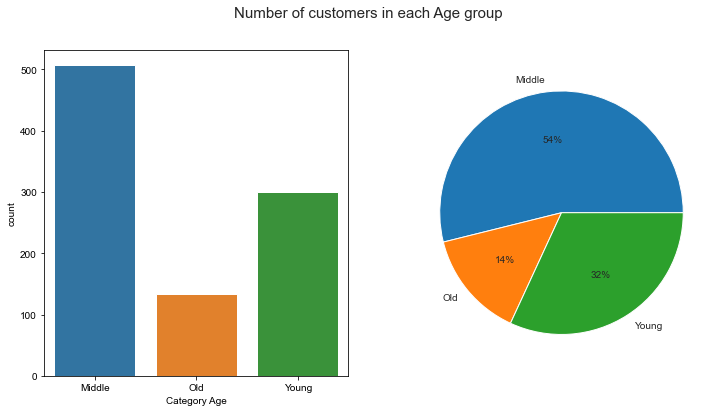

In [28]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.set_style('whitegrid')
sns.countplot(x='Category Age',data=mall_df.sort_values('Category Age'))
plt.subplot(1,2,2)
plt.pie(mall_df['Category Age'].value_counts().sort_index(),
        autopct='%.0f%%',
        labels=mall_df.sort_values('Category Age')['Category Age'].unique())
plt.suptitle('Number of customers in each Age group',fontsize=15)
plt.show()

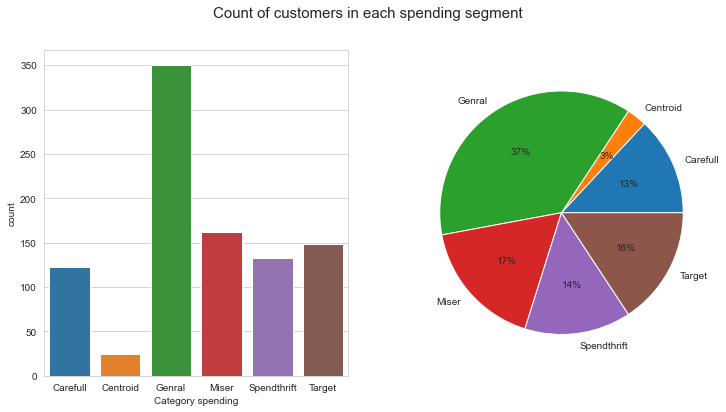

In [29]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='Category spending',data=mall_df.sort_values('Category spending'))
plt.subplot(1,2,2)
plt.pie(mall_df['Category spending'].value_counts().sort_index(),
        autopct='%.0f%%',
        labels=mall_df.sort_values('Category spending')['Category spending'].unique())
plt.suptitle('Count of customers in each spending segment',fontsize=15)
plt.show()

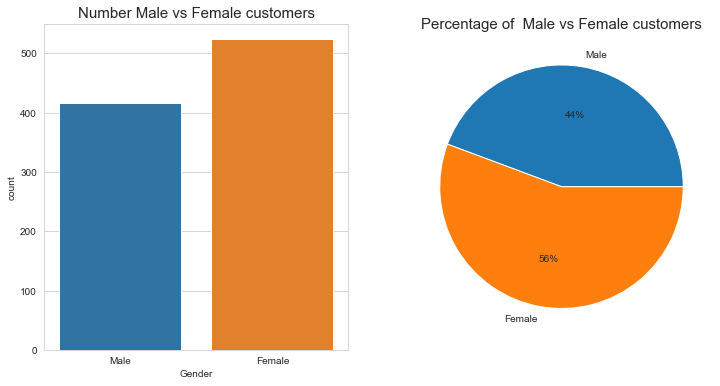

In [30]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
sns.countplot(x='Gender',data=mall_df)
plt.title('Number Male vs Female customers',fontsize=15)
plt.subplot(1,2,2)
plt.pie(mall_df['Gender'].value_counts().sort_values(),
        autopct='%.0f%%',
        labels=mall_df['Gender'].unique())
plt.title('Percentage of  Male vs Female customers',fontsize=15)
plt.show()

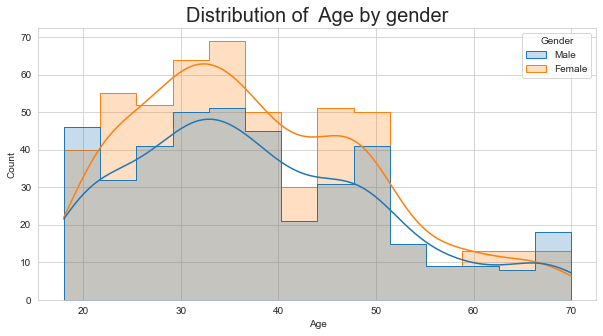

In [31]:
plt.figure(figsize=(10,5))
sns.histplot(x='Age',hue='Gender',data=mall_df,kde=True,element="step")
plt.title('Distribution of  Age by gender',fontsize=20)
plt.show()

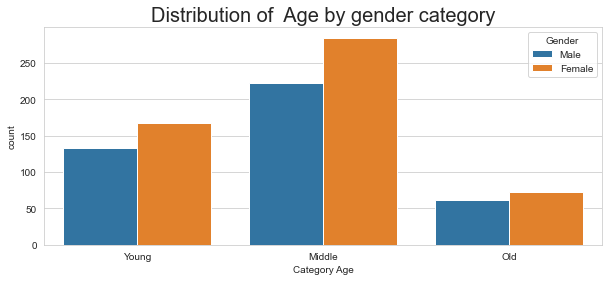

In [32]:
plt.figure(figsize=(10,4))
sns.countplot(x='Category Age',hue='Gender',data=mall_df)
plt.title('Distribution of  Age by gender category',fontsize=20)
plt.show()

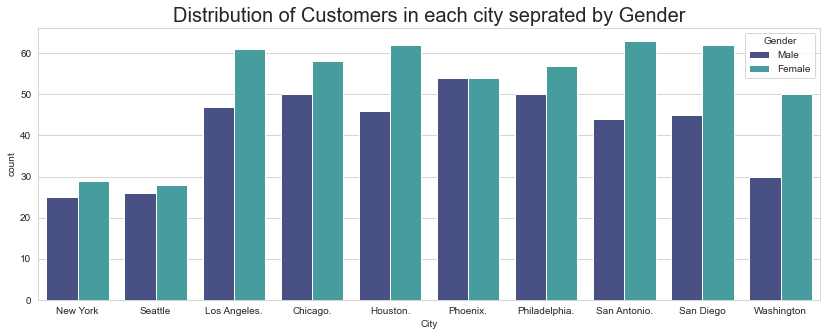

In [33]:
plt.figure(figsize=(14,5))
sns.countplot(x='City',hue='Gender',data=mall_df,palette="mako")
plt.title('Distribution of Customers in each city seprated by Gender',fontsize=20)
plt.show()

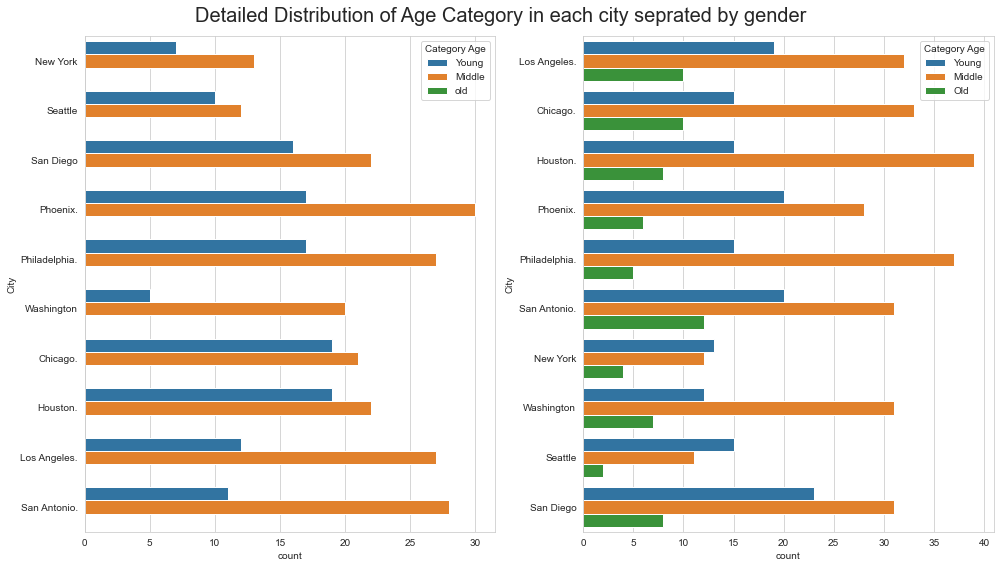

In [34]:
plt.figure(figsize=(14,8))
plt.suptitle('Detailed Distribution of Age Category in each city seprated by gender',fontsize=20)
plt.subplot(1,2,1)
sns.countplot(y='City',hue='Category Age',hue_order=['Young','Middle','old'],data=mall_df[mall_df['Gender']=='Male'])
plt.subplot(1,2,2)
sns.countplot(y='City',hue='Category Age',data=mall_df[mall_df['Gender']=='Female'])
plt.tight_layout()
plt.show()

In [35]:
def city_age(city):
    plt.figure(figsize=(15,3))
    plt.subplot(1,2,1)
    sns.histplot(x='Age',hue='Gender',hue_order=['Male','Female'],multiple='stack',kde=True,data=mall_df[mall_df['City']==str(city)])
    plt.ylabel('')
    plt.subplot(1,2,2)
    sns.boxplot(x='Age',data=mall_df[mall_df['City']==str(city)])
    plt.ylabel('')
    plt.suptitle('Distribution of age in '+city+' City',fontsize=15)
    plt.show()

# Detailed distrubition of age in each city

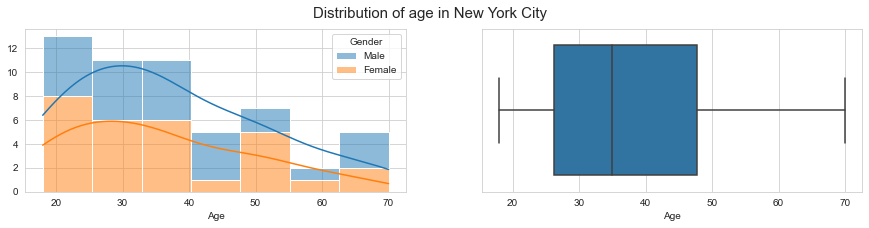

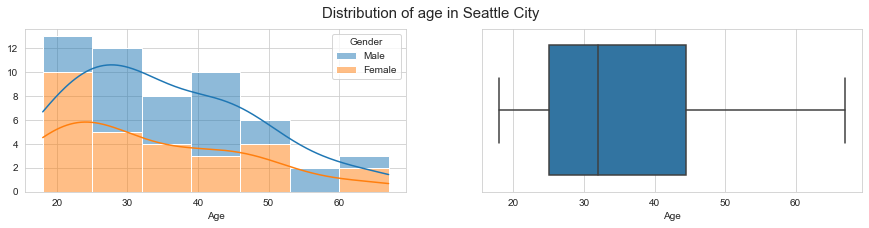

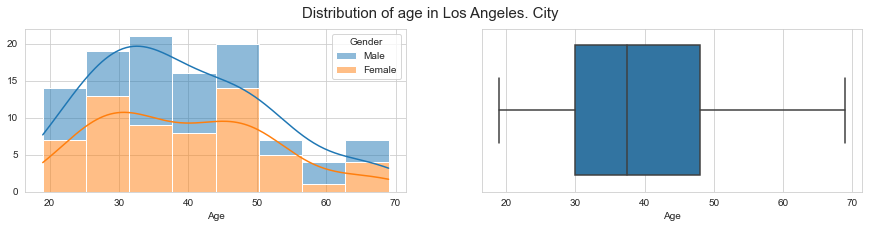

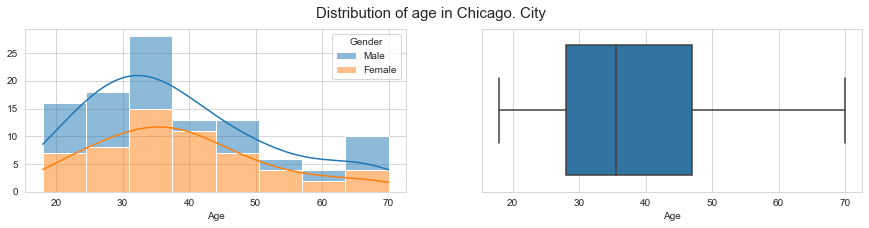

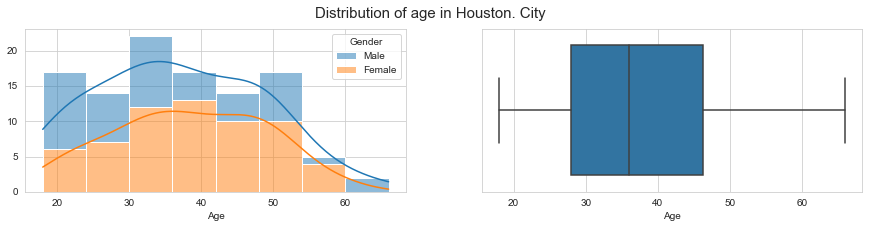

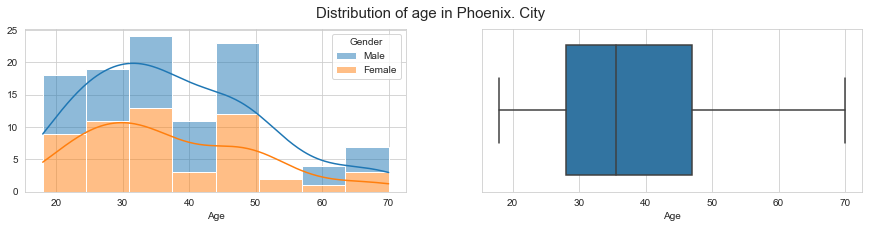

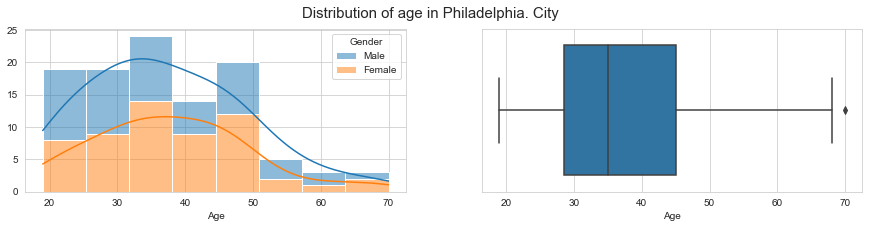

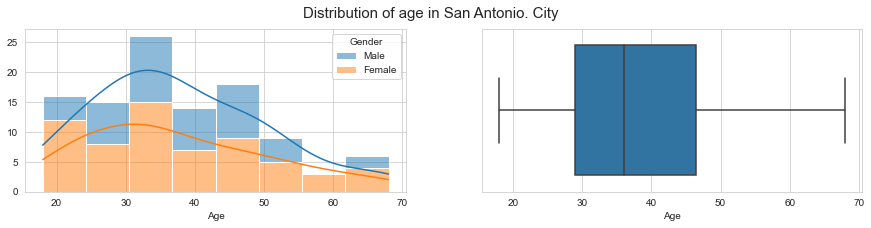

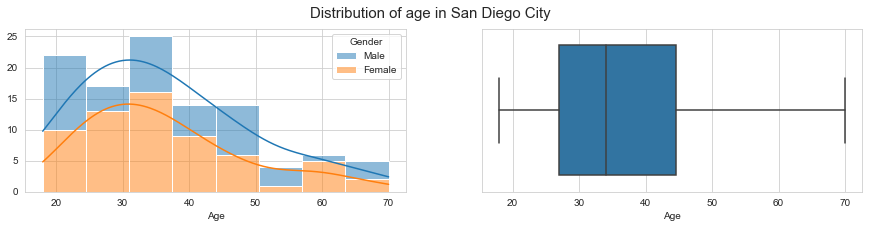

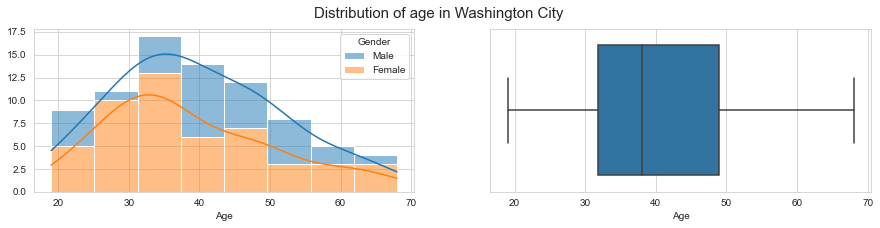

In [36]:
for i in mall_df['City'].unique():
    city_age(i)

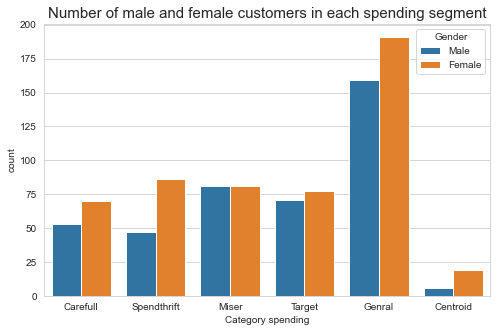

In [37]:
plt.figure(figsize=(8,5))
plt.title('Number of male and female customers in each spending segment',fontsize=15)
sns.countplot(x='Category spending',data=mall_df,hue='Gender')
plt.show()

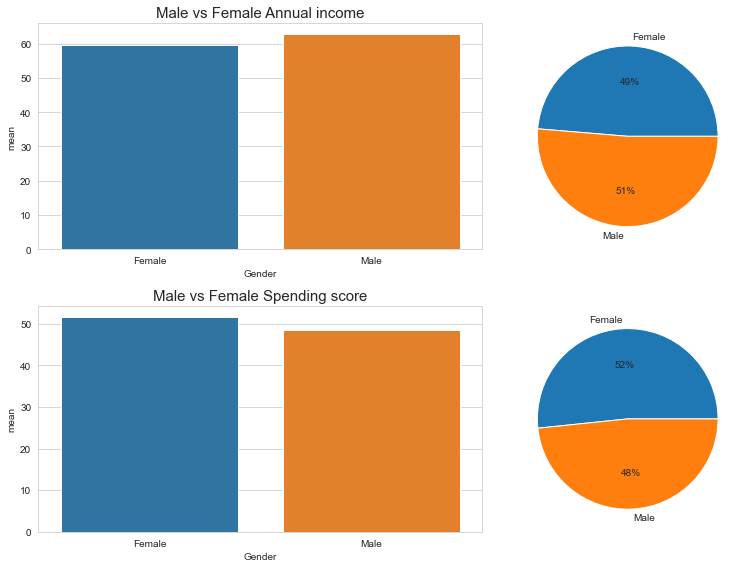

In [38]:
a=mall_df.groupby('Gender').describe()['Annual Income'].reset_index()
b=mall_df.groupby('Gender').describe()['Spending Score %'].reset_index()

plt.figure(figsize=(12,8))
plt.subplot(2,2,1)
sns.barplot(x='Gender',y='mean',data=a)
plt.title('Male vs Female Annual income',fontsize=15)
plt.tight_layout()


plt.subplot(2,2,2)
plt.pie(a['mean'],
        autopct='%.0f%%',
        labels=a['Gender'].unique())
plt.tight_layout()





plt.subplot(2,2,3)
sns.barplot(x='Gender',y='mean',data=b)
plt.title('Male vs Female Spending score',fontsize=15)
plt.tight_layout()


plt.subplot(2,2,4)
plt.pie(b['mean'],
        autopct='%.0f%%',
        labels=b['Gender'].unique())
plt.tight_layout()

plt.show()

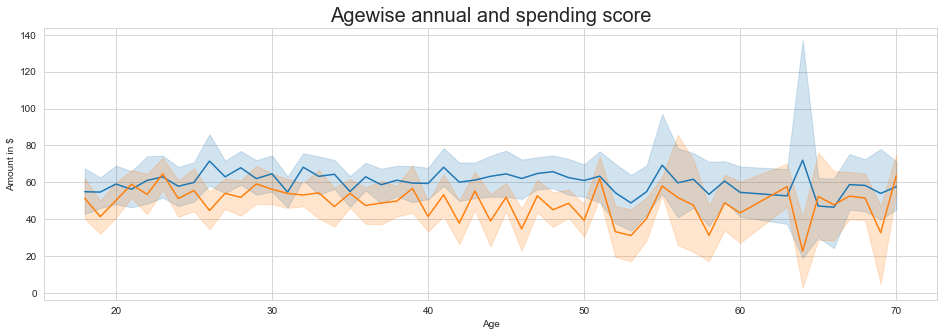

In [39]:
plt.figure(figsize=(16,5))
sns.lineplot(x='Age', y='Annual Income', data=mall_df)
sns.lineplot(x='Age', y='Spending Score %', data=mall_df)
plt.title('Agewise annual and spending score', fontsize=20)
plt.ylabel('Amount in $')
plt.show()

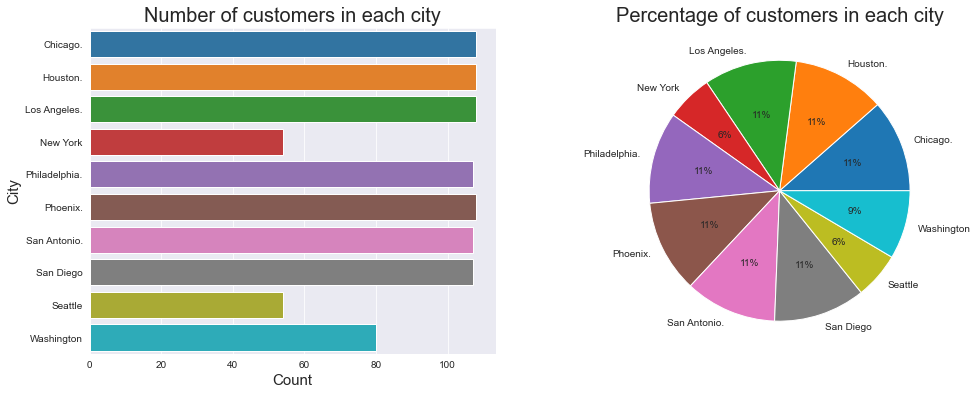

In [40]:
plt.figure(figsize=(16,6))
sns.set_style('darkgrid')
plt.subplot(1,2,1)
sns.countplot(y='City',data=mall_df.sort_values('City'))
plt.title('Number of customers in each city',fontsize=20)
plt.xlabel('Count',fontsize=15)
plt.ylabel('City',fontsize=15)

plt.subplot(1,2,2)
a=mall_df['City'].unique()
a.sort()

plt.pie(mall_df['City'].value_counts().sort_index(),
        autopct='%.0f%%',labels=a)
plt.title('Percentage of customers in each city',fontsize=20)
plt.show()

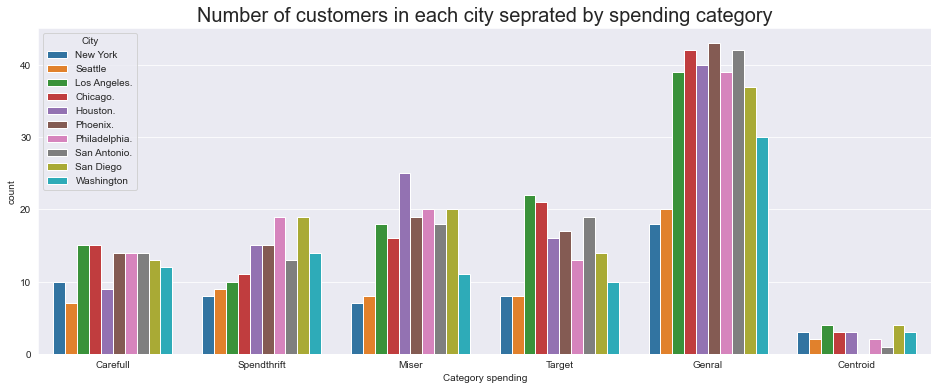

In [41]:
plt.figure(figsize=(16,6))
plt.title('Number of customers in each city seprated by spending category',fontsize=20)
sns.countplot(x='Category spending',data=mall_df,hue='City')
plt.show()

In [42]:
def new_plot(city):
    plt.figure(figsize=(12,4))
    sns.lineplot(y='Spending Score %', x='Annual Income', data=mall_df[mall_df['City']==str(city)])
    plt.title('Spending score per Annual Income of '+city+' City',fontsize=15)
    #plt.xlabel('')
    plt.show()

# Detailed distrubition of Spending Score per Annual Income in each city

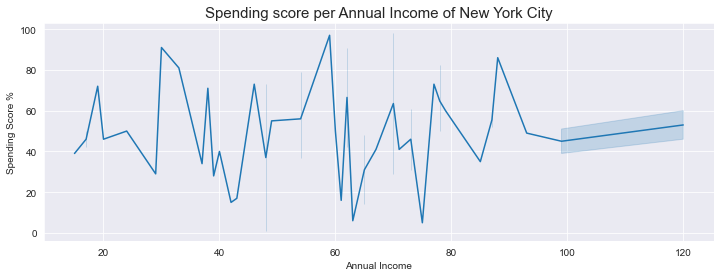

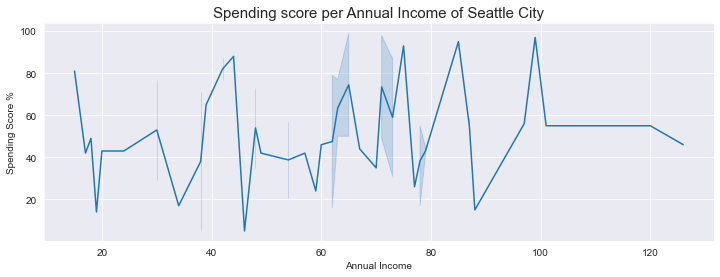

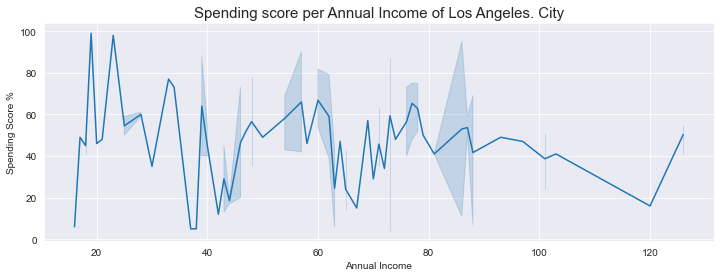

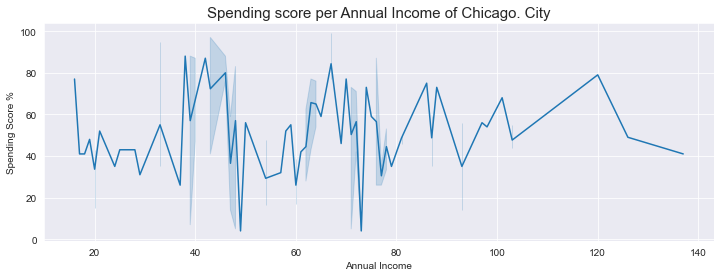

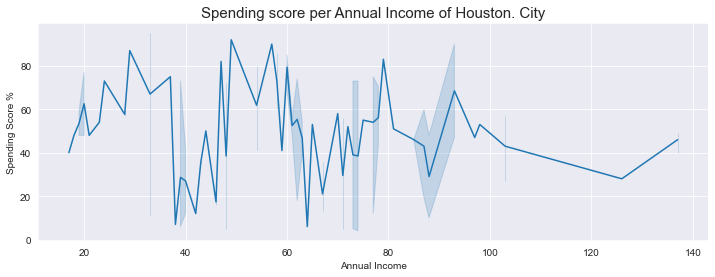

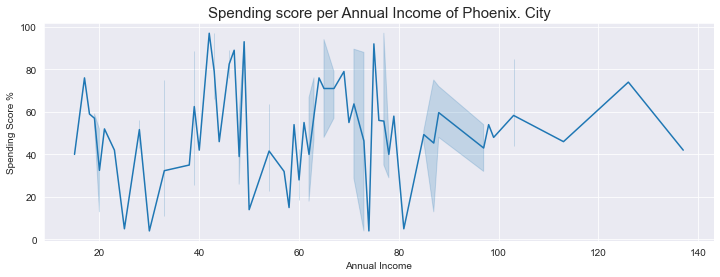

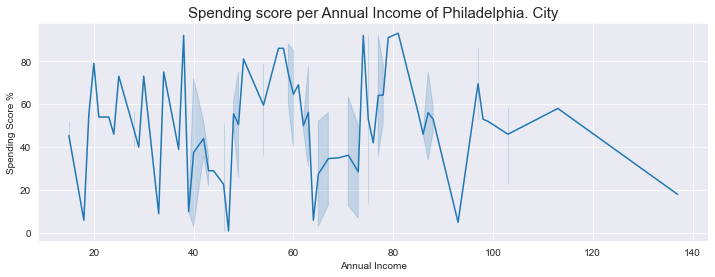

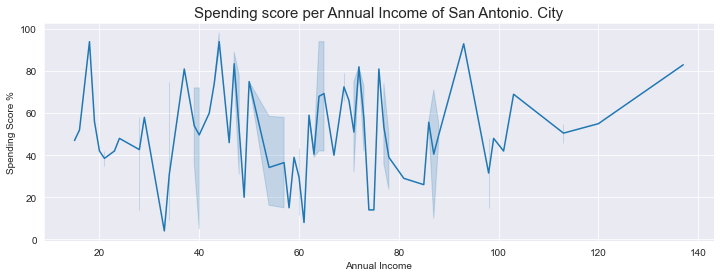

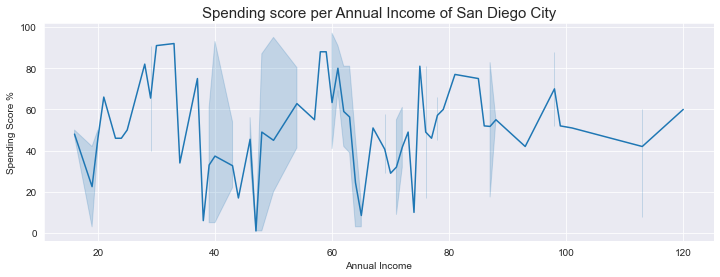

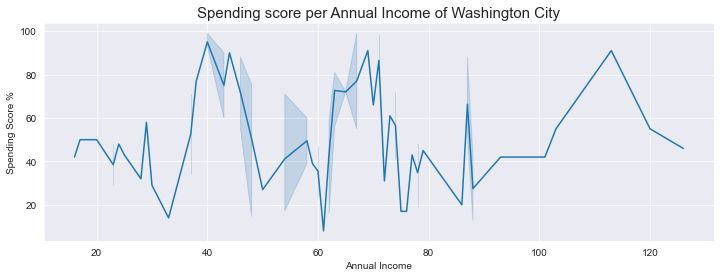

In [43]:
for i in mall_df['City'].unique():
    new_plot(i)

In [44]:
def city_annual(city):
    plt.figure(figsize=(15,6))
    plt.subplot(2,2,1)
    sns.histplot(x='Annual Income',kde=True,data=mall_df[mall_df['City']==str(city)])
    plt.ylabel('')
    plt.subplot(2,2,2)
    sns.boxplot(x='Annual Income',y='Gender',data=mall_df[mall_df['City']==str(city)])
    plt.ylabel('')
    plt.suptitle('Distribution of Annual Income in '+city+' City',fontsize=15)
    
    plt.subplot(2,2,3)
    sns.histplot(x='Spending Score %',kde=True,data=mall_df[mall_df['City']==str(city)])
    plt.ylabel('')
    plt.subplot(2,2,4)
    sns.boxplot(x='Spending Score %',y='Gender',data=mall_df[mall_df['City']==str(city)])
    plt.ylabel('')
    plt.tight_layout()
    #plt.suptitle('Distribution of Spending Score % in '+city+' City',fontsize=15)
    plt.show()

# Detailed distrubition of Annual Income in each city

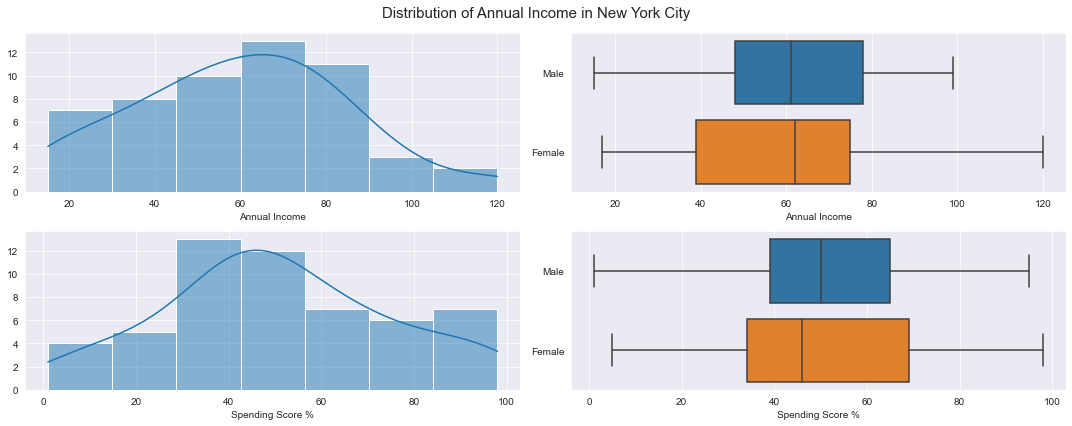

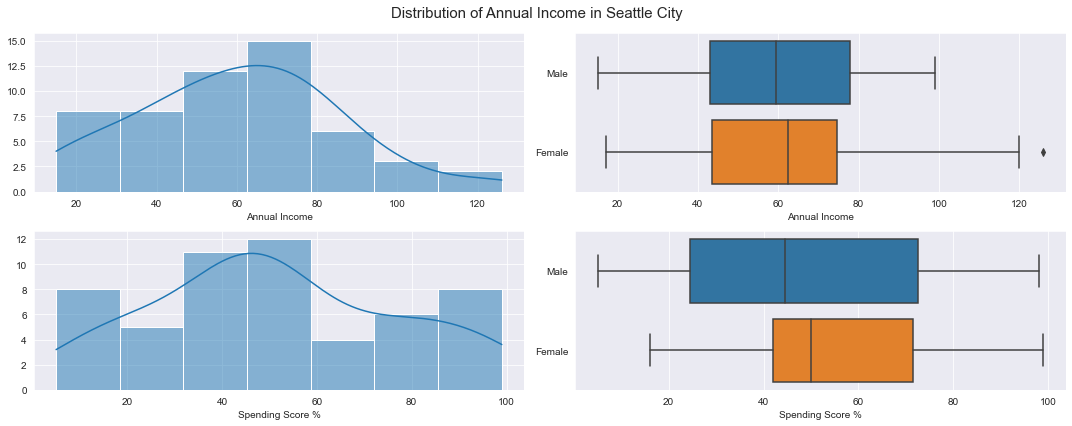

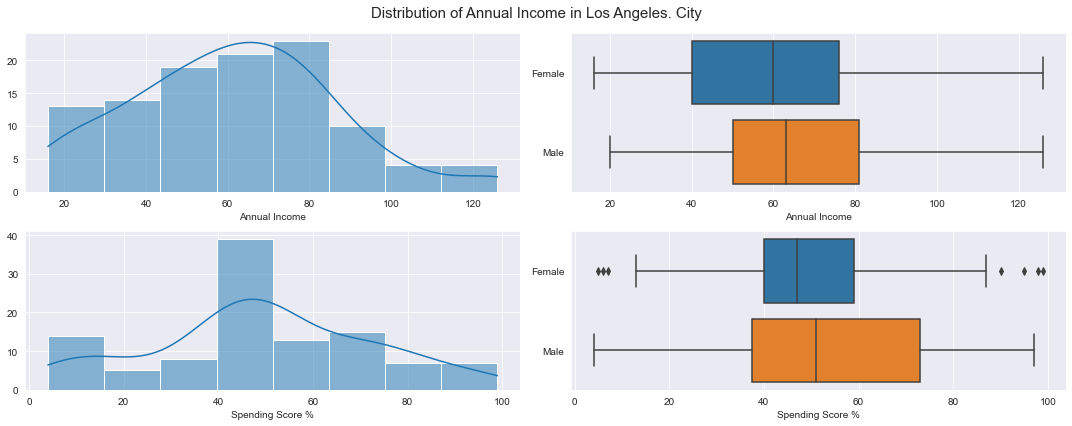

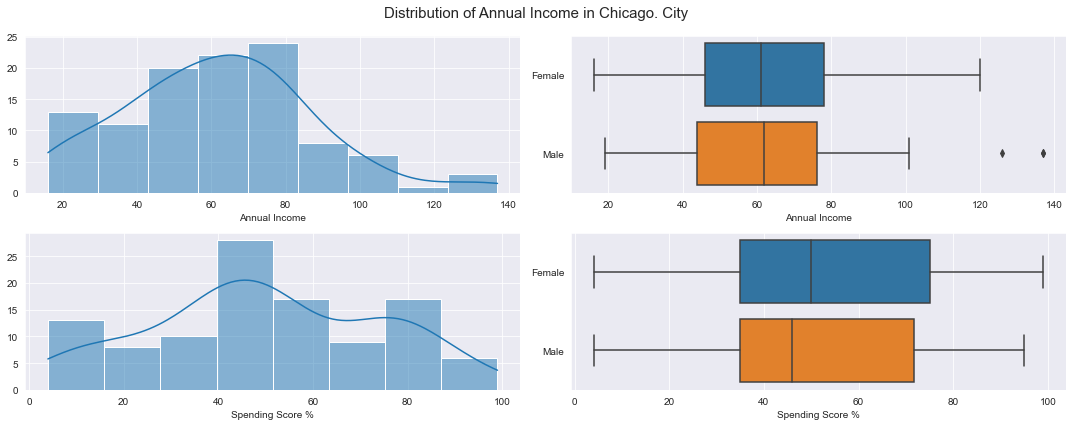

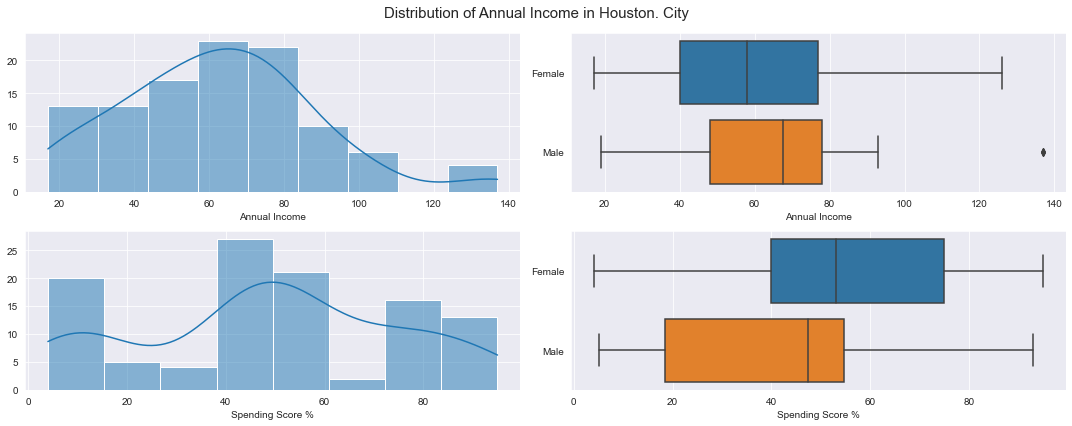

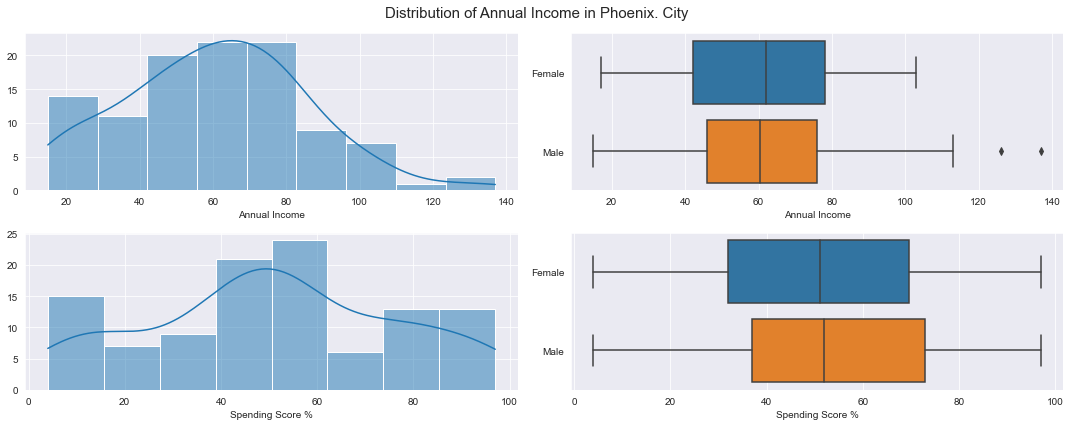

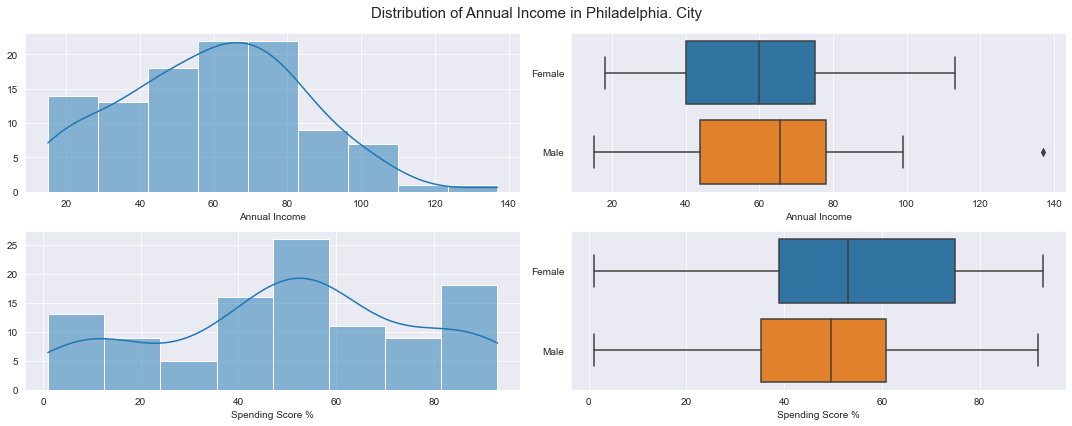

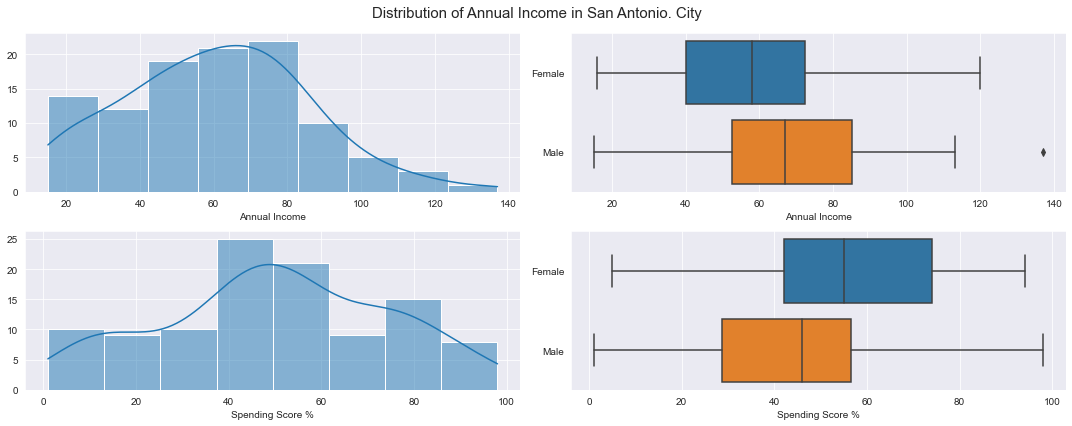

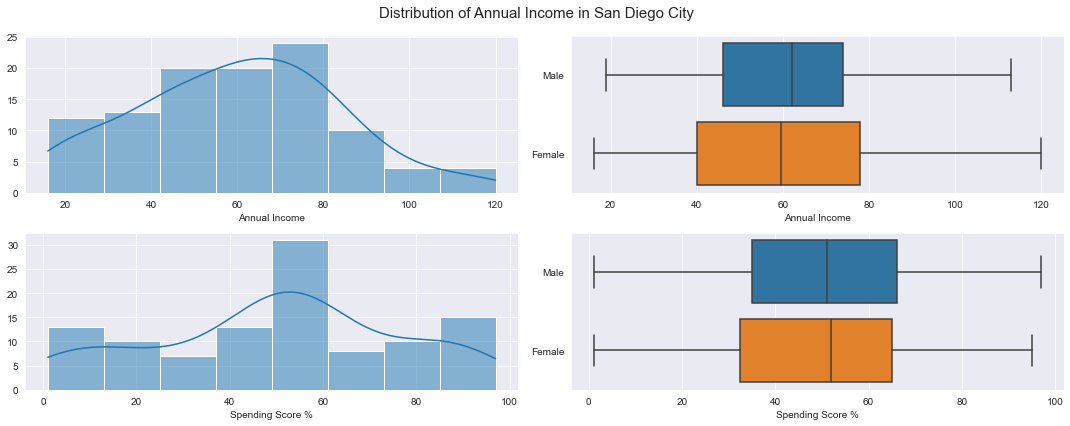

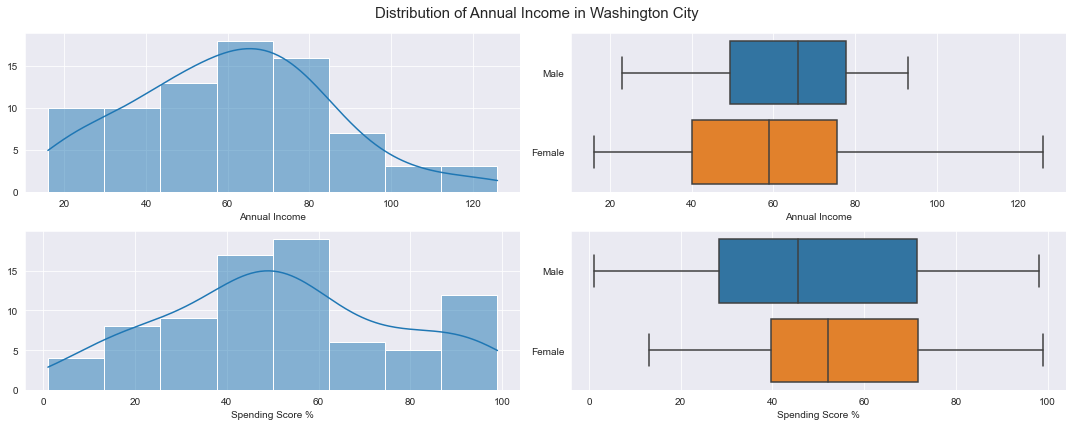

In [45]:
for i in mall_df['City'].unique():
    city_annual(i)

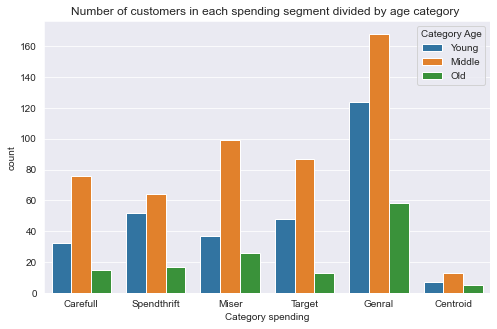

In [46]:
plt.figure(figsize=(8,5))
plt.title('Number of customers in each spending segment divided by age category ')
sns.countplot(x='Category spending',data=mall_df,hue='Category Age')
plt.show()

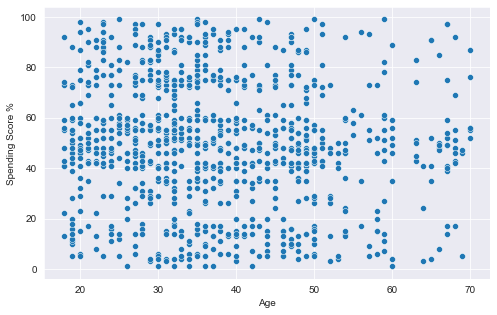

In [47]:
plt.figure(figsize=(8,5))
sns.scatterplot(y='Spending Score %',x='Age',data=mall_df)
plt.show()

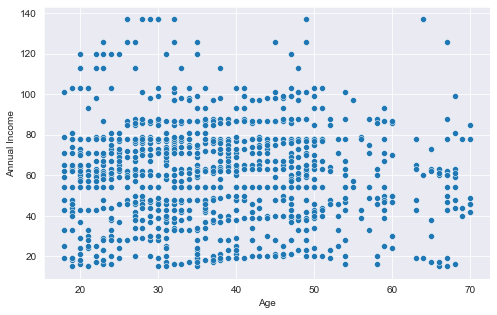

In [48]:
plt.figure(figsize=(8,5))
sns.scatterplot(y='Annual Income',x='Age',data=mall_df)
plt.show()

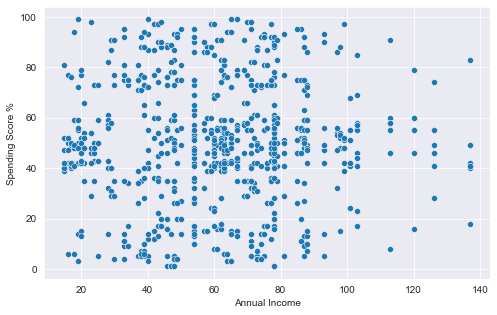

In [49]:
plt.figure(figsize=(8,5))
sns.scatterplot(y='Spending Score %',x='Annual Income',data=mall_df)
plt.show()

# Data preprocessing

In [50]:
drop_col=['Age','Spending Score %']
clean_df=mall_df.drop(columns=drop_col,axis=1)

In [51]:
clean_df

,Gender,Annual Income,City,Category spending,Category Age
0,Male,15,New York,Carefull,Young
1,Male,15,Seattle,Spendthrift,Young
2,Female,16,Los Angeles.,Miser,Young
3,Female,16,Chicago.,Target,Young
4,Female,17,Houston.,Carefull,Middle
...,...,...,...,...,...
1175,Female,88,Chicago.,Target,Middle
1176,Male,88,Houston.,Miser,Middle
1177,Male,88,Phoenix.,Target,Middle
1178,Male,93,Philadelphia.,Miser,Middle


In [52]:
import category_encoders as ce

In [53]:
encoder = ce.OrdinalEncoder(cols=['City','Gender','Category spending','Category Age'])

In [54]:
clean_df=encoder.fit_transform(clean_df)

In [55]:
clean_df.corr()

,Gender,Annual Income,City,Category spending,Category Age
Gender,1.000000,-0.064509,0.038157,-0.018588,-0.008358
Annual Income,-0.064509,1.000000,-0.010542,0.095862,-0.042489
City,0.038157,-0.010542,1.000000,-0.020305,0.029446
Category spending,-0.018588,0.095862,-0.020305,1.000000,-0.008749
Category Age,-0.008358,-0.042489,0.029446,-0.008749,1.000000


#  (age)

In [56]:
x=clean_df[['Annual Income','City','Category spending']]
y=clean_df[['Category Age']]

In [57]:
from sklearn.model_selection import train_test_split

In [58]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [59]:
x_train

,Annual Income,City,Category spending
31,30,7,4
817,21,4,5
334,73,3,2
694,60,5,4
514,65,8,2
...,...,...,...
547,77,6,1
374,88,8,5
347,77,8,1
793,113,7,5


In [60]:
y_train

,Category Age
31,1
817,2
334,1
694,2
514,2
...,...
547,2
374,2
347,2
793,1


In [61]:
x_test

,Annual Income,City,Category spending
636,34,7,4
326,71,3,4
812,20,8,5
758,78,7,5
887,57,4,1
...,...,...,...
11,19,3,2
872,50,8,4
681,54,8,3
678,54,5,4


In [62]:
y_test

,Category Age
636,2
326,1
812,2
758,2
887,1
...,...
11,2
872,2
681,1
678,2


In [63]:
from sklearn.neighbors import KNeighborsClassifier

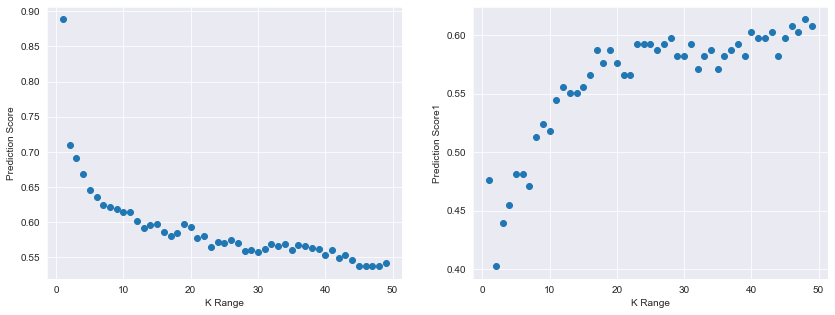

In [64]:
k_range = range(1,50)
score = []
score1 = []


for item in k_range:
    knn = KNeighborsClassifier(n_neighbors=item)
    knn.fit(x_train,y_train)
    score.append(knn.score(x_train,y_train))
    score1.append(knn.score(x_test,y_test))

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(k_range,score)
plt.xlabel('K Range')
plt.ylabel('Prediction Score')
plt.subplot(1,2,2)
plt.scatter(k_range,score1)
plt.xlabel('K Range')
plt.ylabel('Prediction Score1')
plt.show()

In [65]:
kn = KNeighborsClassifier(n_neighbors=18)

In [66]:
kn.fit(x_train,y_train)
print('Model Trained Successfully')

Model Trained Successfully


In [67]:
kn.score(x_train,y_train)

0.5851063829787234

In [68]:
kn.score(x_test,y_test)

0.5767195767195767

In [69]:
y_predict=knn.predict(x_test)

In [70]:
from sklearn.metrics import confusion_matrix

In [71]:
cm=confusion_matrix(y_test,y_predict)

In [72]:
cm

array([[  8,  43,   0],
       [  8, 107,   0],
       [  5,  18,   0]], dtype=int64)

In [73]:
clean_df.corr()

,Gender,Annual Income,City,Category spending,Category Age
Gender,1.000000,-0.064509,0.038157,-0.018588,-0.008358
Annual Income,-0.064509,1.000000,-0.010542,0.095862,-0.042489
City,0.038157,-0.010542,1.000000,-0.020305,0.029446
Category spending,-0.018588,0.095862,-0.020305,1.000000,-0.008749
Category Age,-0.008358,-0.042489,0.029446,-0.008749,1.000000


# (Spending Score)

In [74]:
a=clean_df[['Gender','Annual Income','City','Category Age']]
b=clean_df[['Category spending']]

In [75]:
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2)

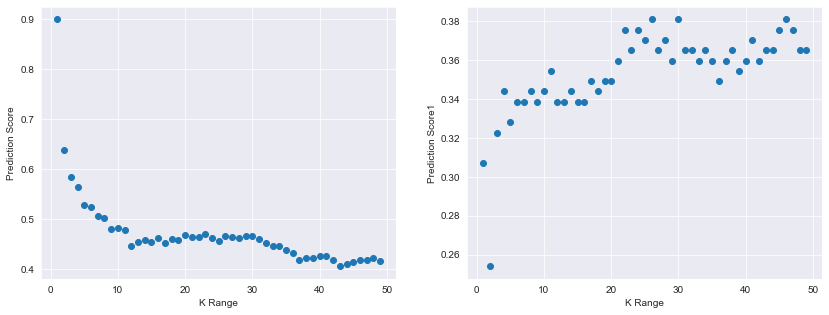

In [76]:
range_k = range(1,50)
s = []
s1 = []


for item in range_k:
    knn = KNeighborsClassifier(n_neighbors=item)
    knn.fit(a_train,b_train)
    s.append(knn.score(a_train,b_train))
    s1.append(knn.score(a_test,b_test))

plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.scatter(range_k,s)
plt.xlabel('K Range')
plt.ylabel('Prediction Score')
plt.subplot(1,2,2)
plt.scatter(range_k,s1)
plt.xlabel('K Range')
plt.ylabel('Prediction Score1')
plt.show()

In [77]:
new = KNeighborsClassifier(n_neighbors=38)

In [78]:
new.fit(a_train,b_train)
print('Model Trained Successfully')

Model Trained Successfully


In [79]:
new.score(a_train,b_train)

0.4228723404255319

In [80]:
new.score(a_test,b_test)

0.36507936507936506

In [81]:
b_pred=new.predict(a_test)

In [82]:
m=confusion_matrix(b_pred,b_test)

In [83]:
m

array([[ 1,  0,  0,  0,  0,  0],
       [ 3,  2,  4,  1,  5,  0],
       [ 8, 11,  9, 10,  5,  0],
       [ 2,  2,  1,  1,  2,  0],
       [12, 13, 16, 19, 56,  6],
       [ 0,  0,  0,  0,  0,  0]], dtype=int64)